## Факторный анализ

### Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

В файле Export_Data.xlsx содержаться данные Всемирного банка по разным статьям экспорта по странам за 2018 год.

Описание переменных:

CountryName - Country Name
CountryCode - Country Code
Agriculturalrawmaterialsexpor - Agricultural raw materials exports (% of merchandise
exports)
ArmsexportsSIPRItrendindica - Arms exports (SIPRI trend indicator values)
Commercialserviceexportscurr - Commercial service exports (current US dollars)
Communicationscomputeretc - Communications, computer, etc. (% of service exports, BoP)
Exportsofgoodsandservices - Exports of goods and services (% of GDP)
Exportsofgoodsandservicesa - Exports of goods and services (annual percent growth)
ExportsofgoodsandservicesB - Exports of goods and services (BoP, current US dollars)
Exportsofgoodsandservicesc - Exports of goods and services (constant 2010 US dollarc)
Foodexportsofmerchandisee - Food exports (% of merchandise exports)
GoodsexportsBoPcurrentUS - Goods exports (BoP, current US dollars)
Fuelexportsofmerchandisee - Fuel exports (% of merchandise exports)
Hightechnologyexportsofma - High-technology exports (% of manufactured exports)
Hightechnologyexportscurrent - High-technology exports (current US dollars)
TaxesonexportscurrentLCU - Taxes on exports (current LCU)
Transportservicesofservice - Transport services (% of service exports, BoP)
Travelservicesofcommercial - Travel services (% of commercial service exports)
Travelservicesofserviceex - Travel services (% of service exports, BoP)

In [89]:
df1 = pd.read_excel('C:/Users/daria/Downloads/Export_Data.xlsx')
df1

,CountryName,CountryCode,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,Foodexportsofmerchandisee,GoodsexportsBoPcurrentUS,Fuelexportsofmerchandisee,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex
0,Afghanistan,AFG,17.113304,NaN,6.230657e+08,28.402324,NaN,NaN,1.611540e+09,NaN,65.086420,8.752371e+08,10.469329,NaN,NaN,NaN,24.602029,4.482772,3.793358
1,Albania,ALB,0.313849,NaN,3.574339e+09,16.058391,31.684671,3.196598,4.784712e+09,4.807222e+09,9.042059,1.163649e+09,1.663178,0.049514,591717.0,NaN,8.443837,61.150507,60.361848
2,Algeria,DZA,NaN,NaN,NaN,NaN,25.623547,-4.300000,NaN,5.296803e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,68.867925,14.325843,NaN,3.321704e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1.551347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581574,NaN,0.013955,28.460560,33913480.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,PSE,NaN,NaN,5.608593e+08,36.257881,19.865352,7.878720,2.903485e+09,2.456322e+09,NaN,2.290995e+09,NaN,NaN,NaN,NaN,1.625164,43.720375,40.034937
214,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,ZMB,0.903647,NaN,9.532642e+08,3.739193,37.422550,NaN,9.982666e+09,NaN,6.146432,9.029402e+09,1.045940,1.998837,25805407.0,NaN,5.641202,77.857990,77.857990


In [59]:
columns = df1.columns

In [67]:
df1_factors = df1[[columns[3], columns[4], columns[5], columns[-2], columns[-6], columns[2], columns[10], columns[-1], columns[-7]]]
df1_factors = df1_factors.dropna(subset= [columns[3], columns[4], columns[5], columns[-2], columns[-6], columns[2], columns[10], columns[-1], columns[-7]])
#формируем датасет, содержащий только переменные, по которым будет проведён факторный анализ и убираем нулевые значения

In [68]:
df1_factors_with_contryName = df1[[columns[0], columns[3], columns[4], columns[5], columns[-2], columns[-6], columns[2], columns[10], columns[-1], columns[-7]]]

### Оценка применимости факторного анализа данных

In [69]:
calculate_bartlett_sphericity(df1_factors) #результаты теста сферичности Бартлетта

(312.559929270966, 8.383041036780422e-46)

## 1) Интерпретируйте результаты расчёта показателя KMO.

In [70]:
_, kmo_model = calculate_kmo(df1_factors)
kmo_model #KMO

0.5278063125358026

Полученное значение КМО говорит о том, что данные умеренно подходят для факторного анализа, но результаты могут быть не идеальны. Можно попробовать провести факторный анализ, но результаты следует интерпретировать с осторожностью.

## 2) Дайте названия полученным фактором, по которым можно было бы понять, что именно они оценивают. Подробно опишите каждый фактор и обоснуйте выбор названия.

### Код

In [71]:
fa1 = FactorAnalyzer(n_factors=9, rotation='varimax', method='principal') 
#строим факторную модель для 9 факторов, что соответствует общему числу переменных
fa1.fit(df1_factors)

FactorAnalyzer(method='principal', n_factors=9, rotation='varimax',
               rotation_kwargs={})

In [72]:
ev, v = fa1.get_eigenvalues()
ev #9 собственных значений

array([3.39145785e+00, 1.59648955e+00, 1.40072202e+00, 9.52122633e-01,
       6.77508598e-01, 4.88049648e-01, 2.99250971e-01, 1.93963946e-01,
       4.34786436e-04])

In [73]:
ev.sum()

9.000000000000004

In [74]:
ev[ev > 1] #3 собственных значения выше 1, значит оставляем 3 фактора

array([3.39145785, 1.59648955, 1.40072202])

### Scree Plot

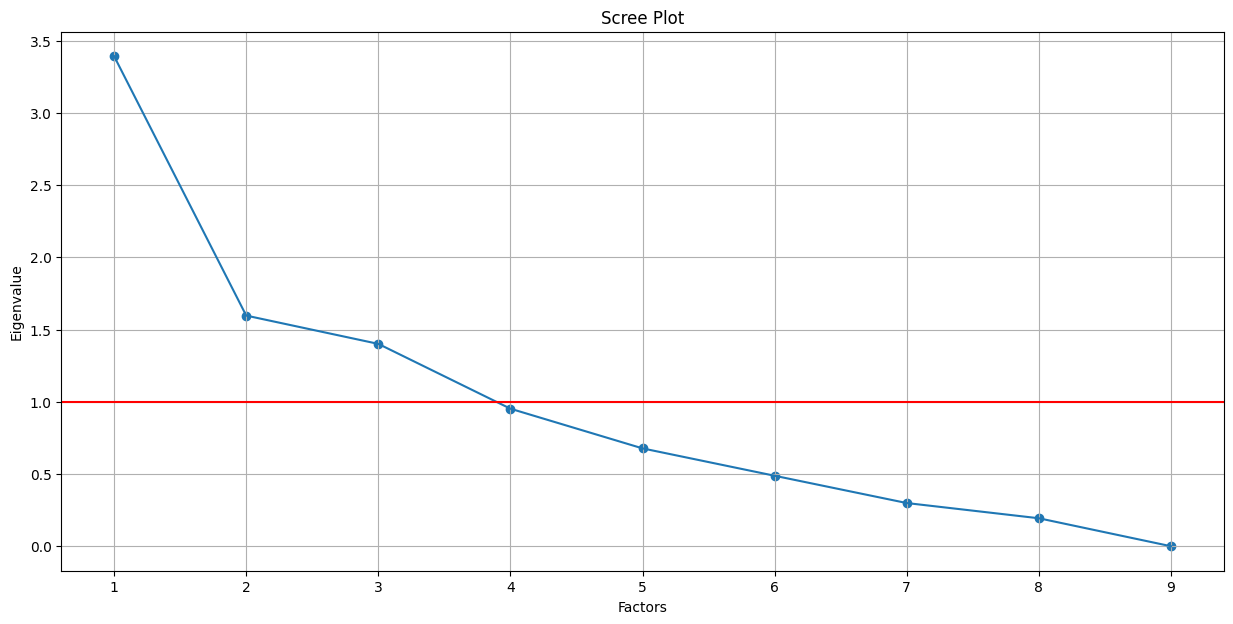

In [75]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df1_factors.shape[1]+1), ev)
plt.plot(range(1, df1_factors.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Факторная модель

In [76]:
fa1 = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal') 
#строим факторную модель для 3 факторов
fa1.fit(df1_factors)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [77]:
fa1.loadings_

array([[ 0.03495831,  0.90038696, -0.08019546],
       [-0.17310033,  0.90520287, -0.08267534],
       [-0.76483043,  0.24842808,  0.07983983],
       [ 0.8902413 , -0.00955075,  0.288756  ],
       [-0.46327092,  0.44344083, -0.09362174],
       [ 0.1447279 , -0.08387617,  0.84567532],
       [ 0.30626804, -0.14988744,  0.79748523],
       [ 0.88945043, -0.00741308,  0.28465082],
       [ 0.43127732, -0.01449737, -0.45960369]])

In [78]:
factors1 = pd.DataFrame(data=fa1.loadings_, 
                       index=df1_factors.columns, 
                       columns=['Factor_1', 'Factor_2', 'Factor_3'])
factors1

,Factor_1,Factor_2,Factor_3
ArmsexportsSIPRItrendindica,0.034958,0.900387,-0.080195
Commercialserviceexportscurr,-0.173100,0.905203,-0.082675
Communicationscomputeretc,-0.764830,0.248428,0.079840
Travelservicesofcommercial,0.890241,-0.009551,0.288756
Hightechnologyexportsofma,-0.463271,0.443441,-0.093622
Agriculturalrawmaterialsexpor,0.144728,-0.083876,0.845675
Foodexportsofmerchandisee,0.306268,-0.149887,0.797485
Travelservicesofserviceex,0.889450,-0.007413,0.284651
Fuelexportsofmerchandisee,0.431277,-0.014497,-0.459604


In [79]:
factors1.index = ["Arms exports (SIPRI trend indicator values)",
    "Commercial service exports (current US dollars)",
    "Communications, computer, etc. (% of service exports, BoP",
    "Travel services (% of commercial service exports)",
    "High-technology exports (% of manufactured exports)",
    "Agricultural raw materials exports (% of merchandise exports)",
    "Food exports (% of merchandise exports)",
    "Transport services (% of service exports, BoP)",
    "Fuel exports (% of merchandise exports)"]

### Интерпритация

In [99]:
factors1.sort_values('Factor_3', ascending=False) #отсортируем матрицу по первому столбцу

,Factor_1,Factor_2,Factor_3
Agricultural raw materials exports (% of merchandise exports),0.144728,-0.083876,0.845675
Food exports (% of merchandise exports),0.306268,-0.149887,0.797485
Travel services (% of commercial service exports),0.890241,-0.009551,0.288756
"Transport services (% of service exports, BoP)",0.889450,-0.007413,0.284651
"Communications, computer, etc. (% of service exports, BoP",-0.764830,0.248428,0.079840
Arms exports (SIPRI trend indicator values),0.034958,0.900387,-0.080195
Commercial service exports (current US dollars),-0.173100,0.905203,-0.082675
High-technology exports (% of manufactured exports),-0.463271,0.443441,-0.093622
Fuel exports (% of merchandise exports),0.431277,-0.014497,-0.459604


<b> Фактор 1 - Туристические и транспортные услуги. </b>  Фактор 1 имеет высокие положительные значения для туристических и транспортных услуг (>0,88), и отрицательные значения для категорий, связанных с экспортом высокотехнологичных товаров и услуг в области информационных технологий. 

<b> Фактор 2 - Коммерческие и оборонные услуги. </b>  Фактор 2 имеет высокие положительные значения для коммерческих услуг и экспорта оружия (>0,9), и отрицательные значения для всех товарных экспортов.

<b> Фактор 3 - Агроэкспорт. </b> Фактор 3 имеет высокие положительные значения для экспорта сельскохозяйственного сырья и продовольствия (>0,79), и отрицательные значения для экспорта топлива, инновационных технологий.

## 3) Укажите процент вариации исходных переменных, объяснённой моделью.

In [81]:
cumulative_variances = fa1.get_factor_variance()[2]
cumulative_variances

array([0.30168549, 0.51483026, 0.70985216])

In [82]:
factor_variance = pd.DataFrame(data=fa1.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=factors1.columns)
factor_variance

,Factor_1,Factor_2,Factor_3
Proportional variance,0.301685,0.213145,0.195022
Cumulative variance,0.301685,0.514830,0.709852


Накопленная вариация показывает, что в сумме <b> три фактора объясняют 70.99% общей вариации всех переменных </b>, при этом:

<b> Фактор 1 объясняет 30.17% </b>общей вариации. Это наибольший вклад среди трех факторов, что указывает на его значимость в структуре данных.

<b> Фактор 2 объясняет 21.31% </b>вариации, что также является значительным, однаки и меньше, чем у первого фактора.

<b> Фактор 3 объясняет 19.50% </b>вариации, что делает его важным, но менее значимым по сравнению с первыми двумя факторами.

## 4) Какие значения факторов у России (или другой страны)? Интерпретируйте их.

## 5) Сохраните факторы в виде переменных в датасете.

In [93]:
df1[df1['CountryName'] == 'Russian Federation']

,CountryName,CountryCode,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,Foodexportsofmerchandisee,GoodsexportsBoPcurrentUS,Fuelexportsofmerchandisee,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex
161,Russian Federation,RUS,2.218907,6.409000e+09,6.360316e+10,17.272716,30.741135,5.488091,5.077556e+11,5.643508e+11,5.466238,4.431299e+11,52.017168,10.963008,1.018301e+10,2.999517e+12,34.265527,18.059244,17.773507


Как мы видим у России 161 индекс, значит посмтроим конктанированную таблицу и рассмотрим значения в строке с индексом 161

In [95]:
transformed = pd.DataFrame(data=fa1.transform(df1_factors),
                           index=df1_factors.index,
                           columns=factors1.columns)

In [97]:
df2 = pd.concat([df1_factors, transformed], axis=1)
df2

,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Travelservicesofcommercial,Hightechnologyexportsofma,Agriculturalrawmaterialsexpor,Foodexportsofmerchandisee,Travelservicesofserviceex,Fuelexportsofmerchandisee,Factor_1,Factor_2,Factor_3
10,3.800000e+07,6.856142e+10,4.851458,65.777866,16.708318,2.293782,12.546827,64.968547,24.448891,1.732818,0.197110,-0.232909
11,5.000000e+06,7.413284e+10,8.824110,31.340080,11.638526,1.613744,7.456444,31.080313,2.047786,0.124246,-0.323100,-0.253388
17,5.600000e+07,8.796300e+09,16.045364,10.040585,3.984641,2.527182,14.878808,10.016445,24.399641,-0.523925,-0.901666,-0.273019
18,1.600000e+07,1.209799e+11,13.964862,7.357825,10.325728,1.295423,9.672998,7.206739,9.035630,-0.814470,-0.450307,-0.405493
26,1.110000e+08,3.464350e+10,9.332589,17.090179,12.950613,5.076894,34.058895,16.706320,12.497014,-0.393343,-0.501164,1.103432
29,7.000000e+06,1.072085e+10,6.280294,41.778404,9.979608,1.336765,14.685105,41.757994,8.136383,0.718934,-0.464816,-0.194999
35,8.400000e+07,9.195205e+10,11.759180,23.900805,15.723038,4.690708,12.279226,23.584394,24.658068,-0.100510,-0.159203,0.146425
40,0.000000e+00,9.865581e+09,4.982206,29.961645,6.383150,6.827398,24.467152,28.772957,0.897962,0.133148,-0.652234,1.294548
52,6.400000e+07,3.037185e+10,14.064808,24.543295,19.561085,1.328152,4.119710,24.513969,1.928104,-0.470734,-0.289420,-0.320650
53,2.700000e+07,7.793175e+10,18.863973,11.638208,13.862368,2.615830,19.397736,11.582422,4.630226,-1.015253,-0.383514,0.436167


Из полученных значений факторов для Российской Федерации, можно сделать следующие выводы:

#### Factor_1 = 0,389159
Умеренное положительное влияние фактора "Туристические и транспортные услуги", что является выгодным на мировом рынка.

#### Factor_2 = 1,216436
Очень высокое положительное значение фактора "Коммерческие и оборонные услуги" говорит о значительной специализации Российской Федерации на данных услугах. Может указывать на развитую инфраструктуру, что делает Российскую Федерацию Ф важным игроком в таких отраслях.

#### Factor_3 = -1,049774
Высокое отрицательное значение фактора "Агроэкспорт" указывает на слабую зависимость или специализацию в данной сфере. Скорее всего, большая часть сельскохозяйственных продуктов импортируется.